In [3]:
!pip install h5py
!pip install numpy
!pip install matplotlib
!pip install pyjet
!pip install pandas
!pip install tables

Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.
     |████████████████████████████████| 2.9 MB 3.6 MB/s eta 0:00:01
     |████████████████████████████████| 20.1 MB 63.0 MB/s eta 0:00:01
Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.
Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.
     |████████████████████████████████| 13.1 MB 3.4 MB/s eta 0:00:01
     |████████████████████████████████| 90 kB 10.3 MB/s eta 0:00:01
     |████████████████████████████████| 67 kB 8.0 MB/s  eta 0:00:01
Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid

In [5]:
import h5py    
import numpy as np 
import matplotlib.pyplot as plt
from pyjet import cluster,DTYPE_PTEPM
import pandas as pd

In [6]:
fnew = pd.read_hdf("./events_anomalydetection_tiny.h5")

In [7]:
events_combined = fnew.T

In [8]:
np.shape(events_combined)

(2101, 1000)

In [9]:
events_combined.head()

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,0.324101,0.646304,0.325172,0.290918,0.526330,0.307490,0.305228,0.550740,0.823849,0.361629,...,0.357810,0.628534,5.332857,0.988587,1.076049,0.558454,3.224277,0.308288,0.195123,0.271103
1,-0.361158,-0.539460,-0.833948,-2.200063,-2.349110,-1.999438,-1.949587,-1.799677,-2.409386,-1.561485,...,-2.148398,-2.398427,-2.148415,-0.970511,-0.421958,-0.667654,-2.394595,-0.381152,-2.203834,-0.945856
2,2.737669,-1.386258,2.404844,1.630132,-1.745532,2.590663,-2.294166,-3.037725,0.120901,2.277365,...,-1.702027,0.380141,1.640140,-2.217594,0.776023,0.445050,-1.716092,-2.721488,-3.064237,-1.858438
3,0.409859,0.471293,1.295058,0.565028,0.542491,0.296564,0.611917,0.497987,0.392440,1.756224,...,0.416410,0.433638,1.270250,0.746799,1.130025,0.220177,0.461683,2.390583,0.497103,0.538007
4,-2.429939,-1.636572,-2.089618,-1.714345,-2.080352,-2.257138,-1.139748,-2.165318,-1.953236,-0.967060,...,-1.258849,-2.026919,-2.122471,-0.851194,-0.353891,-1.109788,-2.102307,-0.784246,-2.253029,-0.759102


In [10]:
events_combined.tail()

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
2096,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2097,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2098,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2099,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2100,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
hadrons = pd.DataFrame(
    columns=[
        'pT',
        'eta',
        'phi',
        "isSignal",
        "isBackground",
        "nEvent",
    ]
)

In [12]:
ip=0
nEvents = 50
for i in range(nEvents): #np.shape(events_combined)[1]//10):
    isSignal = events_combined[i][2100] == True
    for j in range(700):
        if ( events_combined[i][j*3] >0):
            hadrons.loc[ip] =[
                    events_combined[i][j*3],
                    events_combined[i][j*3+1],
                    events_combined[i][j*3+2],
                    isSignal ,
                    not isSignal,
                    i,
                ]
            ip+=1
            pass
        pass
    pass

In [13]:
hadrons[(hadrons["isBackground"] == True) & (hadrons["nEvent"] == 0)]

ptSignal = hadrons[(hadrons["isSignal"] == True)]
ptBackground = hadrons[(hadrons["isBackground"] == True)]

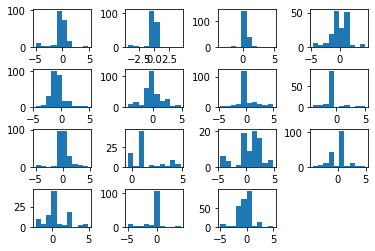

In [14]:
# hadrons[(hadrons["nEvent"] == 7)]["eta"].plot(kind="hist")

# for i in range(1, 12):
#     plt.subplot(3, 4, i)
#     plt.hist(hadrons[(hadrons["nEvent"] == i)]["eta"])

fig = plt.figure()
fig.subplots_adjust(hspace=0.6, wspace=0.6)
for i in range(1, 16):
    ax = fig.add_subplot(4, 4, i)
    ax.hist(hadrons[(hadrons["nEvent"] == i)]["eta"])

(814,)
(814,)
nBins 15


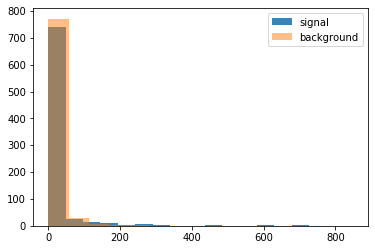

In [15]:
nSamples = 814
nBins = 15 #int(1 + np.log(nSamples))

signalHist = hadrons[(hadrons["isSignal"] == True)]["pT"].head(nSamples)
backgroundHist = hadrons[(hadrons["isBackground"] == True)]["pT"].head(nSamples)


print(np.shape(signalHist))
print(np.shape(backgroundHist))
print("nBins {0}".format(nBins))
plt.hist(signalHist, alpha=0.9, label="signal", bins=nBins)
plt.hist(backgroundHist, alpha=0.5, label="background", bins=nBins)
plt.legend()

In [19]:
nBackground = 0
nSignal = 0

for i in range(np.shape(events_combined)[1]):
    issignal = events_combined[i][2100]

    if (issignal):
        nSignal +=1
        
    elif not issignal:
        nBackground +=1
    continue

print("nSignal {0}   | nBackground {1}".format(nSignal, nBackground))

nSignal 93   | nBackground 907


In [20]:
#Now, let's cluster some jets!
leadpT = {}
alljets = {}
for mytype in ['background','signal']:
    leadpT[mytype]=[]
    alljets[mytype]=[]
    for i in range(np.shape(events_combined)[1]):
        if (i%100==0):
            print(mytype,i)
            pass
        issignal = events_combined[i][2100]
        if (mytype=='background' and issignal):
            continue
        elif (mytype=='signal' and issignal==0):
             continue
        pseudojets_input = np.zeros(len([x for x in events_combined[i][::3] if x > 0]), dtype=DTYPE_PTEPM)
        for j in range(700):
            if (events_combined[i][j*3]>0):
                pseudojets_input[j]['pT'] = events_combined[i][j*3]
                pseudojets_input[j]['eta'] = events_combined[i][j*3+1]
                pseudojets_input[j]['phi'] = events_combined[i][j*3+2]
                pass
            pass
        sequence = cluster(pseudojets_input, R=1.0, p=-1)
        jets = sequence.inclusive_jets(ptmin=20)
        leadpT[mytype] += [jets[0].pt]
        alljets[mytype] += [jets]
        pass

background 0
background 100
background 200
background 300
background 400
background 500
background 600
background 700
background 800
background 900
signal 0
signal 100
signal 200
signal 300
signal 400
signal 500
signal 600
signal 700
signal 800
signal 900


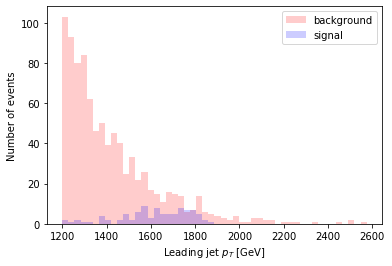

<Figure size 432x288 with 0 Axes>

In [21]:
#Let's make some very simple plots.
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
n,b,p = plt.hist(leadpT['background'], bins=50, facecolor='r', alpha=0.2,label='background')
plt.hist(leadpT['signal'], bins=b, facecolor='b', alpha=0.2,label='signal')
plt.xlabel(r'Leading jet $p_{T}$ [GeV]')
plt.ylabel('Number of events')
plt.legend(loc='upper right')
plt.show()
plt.savefig("leadjetpt.pdf")

In [22]:
mjj={}
for mytype in ['background','signal']:
    mjj[mytype]=[]
    for k in range(len(alljets[mytype])):
        E = alljets[mytype][k][0].e+alljets[mytype][k][1].e
        px = alljets[mytype][k][0].px+alljets[mytype][k][1].px
        py = alljets[mytype][k][0].py+alljets[mytype][k][1].py
        pz = alljets[mytype][k][0].pz+alljets[mytype][k][1].pz
        mjj[mytype]+=[(E**2-px**2-py**2-pz**2)**0.5]
        pass
    pass

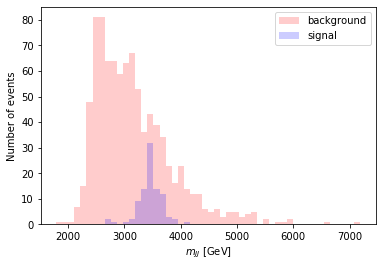

<Figure size 432x288 with 0 Axes>

In [23]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
n,b,p = plt.hist(mjj['background'], bins=50, facecolor='r', alpha=0.2,label='background')
plt.hist(mjj['signal'], bins=b, facecolor='b', alpha=0.2,label='signal')
plt.xlabel(r'$m_{JJ}$ [GeV]')
plt.ylabel('Number of events')
plt.legend(loc='upper right')
plt.show()
plt.savefig("mjj.pdf")